<a href="https://colab.research.google.com/github/DrSnek/Doctor/blob/main/LungCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports:

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [97]:
df = pd.read_csv("survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [98]:
df.drop_duplicates(inplace=True)
df = df.drop(['ALLERGY '], axis = 1)
df = df.drop(['PEER_PRESSURE'], axis = 1)

In [99]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
CHRONIC DISEASE          0
FATIGUE                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [100]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,CHRONIC DISEASE,FATIGUE,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,1,1,0,1,1,1,1,1,1,1,1
1,1,74,1,0,0,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,0,1,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,1,0,1,1,0,0,0


##Functions:

In [101]:
def print_accuracy(y_test, y_pred):
  print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, y_pred)))
  print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, y_pred,labels=None, pos_label=1, average='binary', sample_weight=None)))
  print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, y_pred,labels=None, pos_label=1, average='binary', sample_weight=None)))
  print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)))
  print()

def draw_confusion_matrix(y_test, y_pred, classes):
  plt.cla()
  plt.clf()
  matrix = confusion_matrix(y_test, y_pred)
  plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion Matrix")
  plt.colorbar()
  num_classes = len(classes)
  plt.xticks(np.arange(num_classes), classes, rotation=90)
  plt.yticks(np.arange(num_classes), classes)
  fmt = 'd'
  thresh = matrix.max() / 2.
  import itertools
  for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(j, i, format(matrix[i, j], fmt), horizontalalignment="center", color="white" if matrix[i, j] > thresh else "black")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()
  plt.show()
  print()

In [102]:
def draw_roc_curve(y_test, y_score, title, c="blue", line_width=1):
  fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(y_test, y_score)
  plt.figure(2)
  aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
  plt.plot(fpr_log_reg, tpr_log_reg, color=c, lw=line_width, label = 'AUC = %0.3f' % aucroc)
  plt.title(title)
  plt.xlabel('False Positive Rates')
  plt.ylabel('True Positive Rates')
  plt.legend(loc = 'lower right')
  plt.show()
  print()

def draw_roc_curve_individual(y_test, y_score, label, line_width=1):
  fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(y_test, y_score)
  # plt.figure(2)
  aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
  plt.plot(fpr_log_reg, tpr_log_reg, lw=line_width, label = label + ', AUC = %0.3f' % aucroc)
  # plt.title(title)
  plt.xlabel('False Positive Rates')
  plt.ylabel('True Positive Rates')

##Data Analysis:

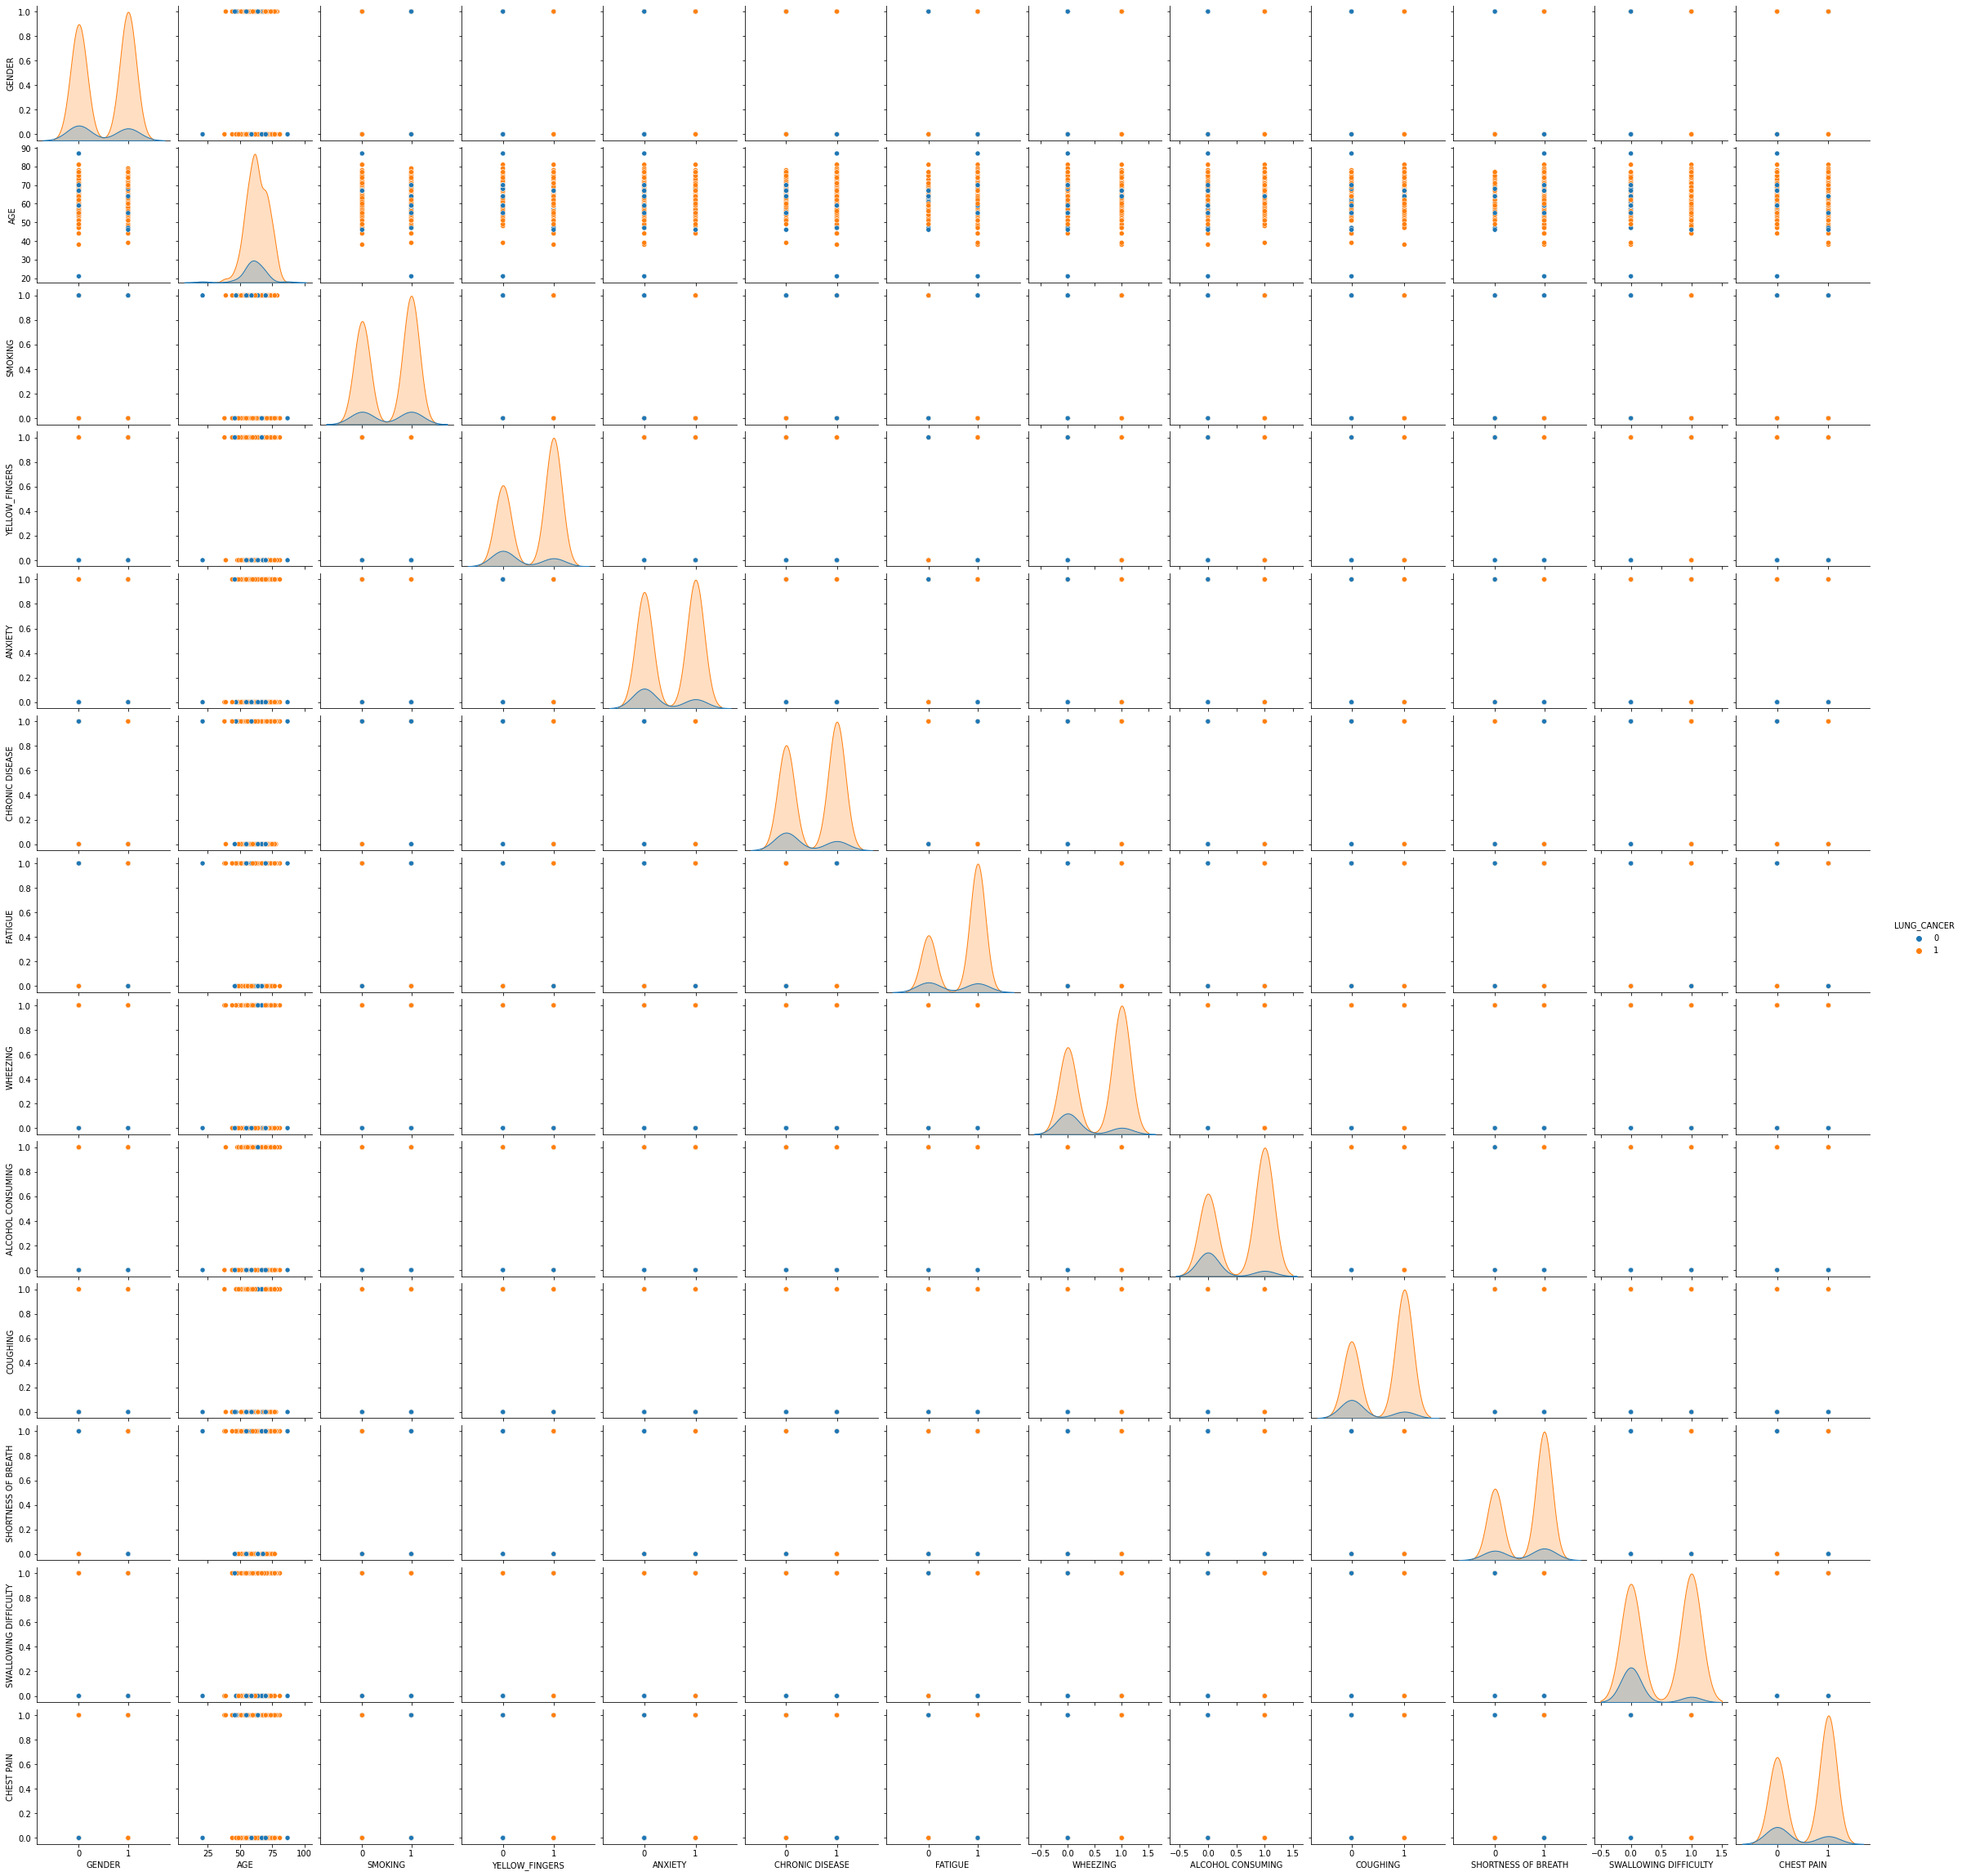

In [103]:
sns.pairplot(data = df, hue = 'LUNG_CANCER')

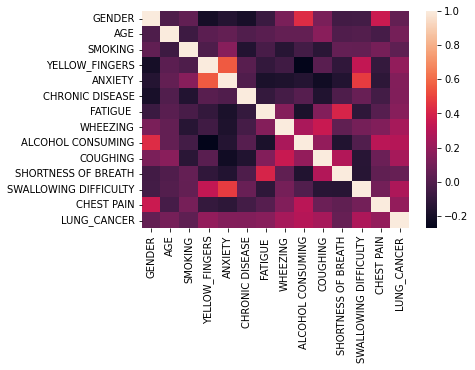

In [105]:
sns.heatmap(df.corr())

##Model:

In [106]:
features = df
features = features.drop(['LUNG_CANCER'], axis = 1)
labels = df['LUNG_CANCER']

In [107]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state = 42)

In [108]:
model = MultinomialNB(alpha = 1.0)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy Score for Naive Bayes: ", (accuracy_score(y_pred,y_test) * 100),"%")

Accuracy Score for Naive Bayes:  84.33734939759037 %


DTC:

In [109]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

Accuracy:    0.867470
Precision:   0.883117
Recall:      0.971429
F1 Score:    0.925170



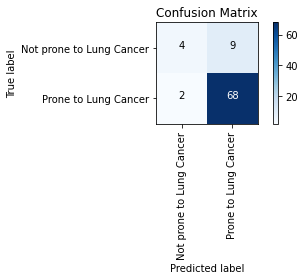

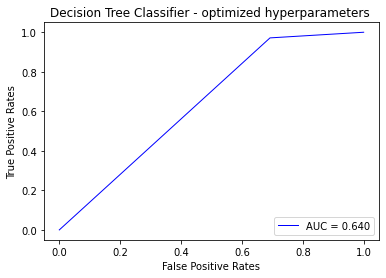

In [111]:
print_accuracy(y_test, pred)
draw_confusion_matrix(y_test, pred, ["Not prone to Lung Cancer", "Prone to Lung Cancer"])
draw_roc_curve(y_test, pred, "Decision Tree Classifier - optimized hyperparameters ", c="blue", line_width=1)

##Accuracy: 86.7%
##Recall: 97.1%
##Decision Tree Classifier 